Algorithm:
    
1. choose k – the number of clusters

2. select k random points as the initial centroids

3. assign each data point to the nearest cluster based on the distance of the data point to the centroid (use Euclidean distance)

4. calculate the new coordinates of all clusters centroids by averaging coordinates over all clusters members

5. repeat steps 3. and 4. until the clusters members do not change anymore

- On place K centroids au hasard dans le dataset.

- Chaque point est affecté au cluster du centroid le plus proche.

- Le centroid est déplacé au milieu du cluster. (là où se situe la moyenne des points)

- jusqu'à ce que le centroid converge vers une position d'équilibre.

It starts with random cluster assignment for each data point. In this example, each data point could be from any one K=3 random clusters.

Then we iterate

for each cluster we compute the center point of the cluster. This is what “means” part of the K-means clustering.
Then for each data point we find the distance to the all K=3 cluster centers and assign the cluster that is closest to the data point. For example, a data point is assigned to a cluster if the distance from the data point and to the cluster is the smallest when compared to the other clusters. We typically use Euclidean distance measure to estimate the distance between a data point to a cluster center.
The iterations are done when our cluster centers stabilizes and do not change between successive iterations.

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.matlib

In [99]:
df = pd.read_csv("dataset_1.csv")
df = StandardScaler().fit_transform(df)
cluster_array = np.array(df)
print(cluster_array)

[[-1.73031962  1.13979705 -0.94534292]
 [-1.72685552  2.10534395 -0.43738712]
 [-1.72339142  0.41727183 -1.29526812]
 ...
 [ 1.72339142 -0.87870586  0.97767634]
 [ 1.72685552 -0.61872132  1.00415686]
 [ 1.73031962 -1.16807229  0.3629466 ]]


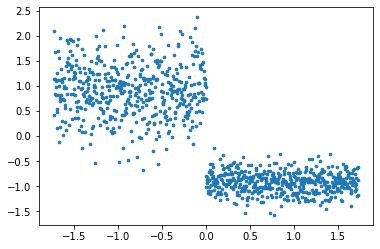

In [84]:
# Getting the values and plotting it
plt.scatter(df[:,0], df[:,1],s=7)

In [88]:
def calc_distance(X1, X2):
    return (sum((X1 - X2)**2))**0.5

In [89]:
# Assign cluster clusters based on closest centroid
def assign_clusters(centroids, cluster_array):
    clusters = []
    for i in range(cluster_array.shape[0]):
        distances = []
        for centroid in centroids:
            distances.append(calc_distance(centroid, cluster_array[i]))
        cluster = [z for z, val in enumerate(distances) if val==min(distances)]
        clusters.append(cluster[0])
    return clusters

In [90]:
# Calculate new centroids based on each cluster's mean
def calc_centroids(clusters, cluster_array):
    new_centroids = []
    cluster_df = pd.concat([pd.DataFrame(cluster_array),pd.DataFrame(clusters, columns=['cluster'])], axis=1)
    for c in set(cluster_df['cluster']):
        current_cluster = cluster_df[cluster_df['cluster']==c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids

In [91]:
# Calculate variance within each cluster
def calc_centroid_variance(clusters, cluster_array):
    sum_squares = []
    cluster_df = pd.concat([pd.DataFrame(cluster_array),pd.DataFrame(clusters, columns=['cluster'])], axis=1)
    for c in set(cluster_df['cluster']):
        current_cluster = cluster_df[cluster_df['cluster']==c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        mean_repmat = np.matlib.repmat(cluster_mean, current_cluster.shape[0],1)
        sum_squares.append(np.sum(np.sum((current_cluster - mean_repmat)**2)))
    return sum_squares

In [96]:
k = 4
cluster_vars = []
centroids = [cluster_array[i+2] for i in range(k)]
clusters = assign_clusters(centroids, cluster_array)
initial_clusters = clusters
print(0, round(np.mean(calc_centroid_variance(clusters, cluster_array))))
for i in range(20):
    centroids = calc_centroids(clusters, cluster_array)
    clusters = assign_clusters(centroids, cluster_array)
    cluster_var = np.mean(calc_centroid_variance(clusters, 
                                                 cluster_array))
    cluster_vars.append(cluster_var)
    print(i+1, round(cluster_var))

0 508.0
1 106.0
2 101.0
3 100.0
4 99.0
5 98.0
6 97.0
7 96.0
8 93.0
9 92.0
10 92.0
11 92.0
12 92.0
13 92.0
14 92.0
15 92.0
16 92.0
17 92.0
18 92.0
19 92.0
20 92.0
